# (D) The Two-Body Problem

In [20]:
# This cell runs the file "Orbital_functions_n.ipynb" such that the functions in that file can be utillized here
%run ./Two_body_functions.ipynb

We want to solve the trajectories of two masses given their masses $m_1$ and $m_2$ and their initial conditions $(r_1,p_1)$ and $(r_2,p_2)$. It has been shown on many occasions that this problem reduces to a one-body problem of a reduced mass $\mu$ in a central potential in the center of mass frame. Thus, given the masses and initial conditions in the two-body fram we want to do the transformation

$$ \mathbf R = \frac{m_1 \mathbf r_1 + m_2 \mathbf r_2}{m_1 + m_2}, \qquad \mathbf V = \dot{\mathbf R} = \frac{m_1 \mathbf v_1 + m_2 \mathbf v_2}{m_1 + m_2}, \qquad \text{and} \qquad \mu = \frac{m_1 m_2}{m_1 + m_2}$$

Then calculate the orbitals, and then do the transformation back


$$R_x (m_1 + m_2) = m_1 r_{1x} + m_2 r_{2x}$$

In [27]:
def findR(m_1,m_2,r_1,r_2):
    M = m_1 + m_2
    r_1x, r_1y = r_1
    r_2x, r_2y = r_2

    R_x = (m_1*r_1x + m_2*r_2x)/M
    R_y = (m_1*r_1y + m_2*r_2y)/M
    R = [R_x, R_y]
    return R

def findV(m_1,m_2,v_1,v_2):
    M = m_1 + m_2
    v_1x, v_1y = v_1
    v_2x, v_2y = v_2

    V_x = (m_1*v_1x + m_2*v_2x)/M
    V_y = (m_1*v_1y + m_2*v_2y)/M
    V = [V_x, V_y]
    return V

def findμ(m_1,m_2):
    μ = m_1*m_2/(m_1+m_2)
    return μ

def findx_1(m_1,m_2,R,rel_pos):
    M = m_1 + m_2
    rel_x, rel_y = rel_pos[0], rel_pos[1]
    R_x, R_y = R[0], R[1]

    xs, ys = [], []
    for i in range(0,len(R_x)):
        xs.append(R_x[i] + m_2/M * rel_x[i])
        ys.append(R_y[i] + m_2/M * rel_y[i])
    x_1 = [xs,ys]
    return x_1

def findx_2(m_1,m_2,R,rel_pos):
    M = m_1 + m_2
    rel_x, rel_y = rel_pos[0], rel_pos[1]
    R_x, R_y = R[0], R[1]

    xs, ys = [], []
    for i in range(0,len(R_x)):
        xs.append(R_x[i] - m_1/M * rel_x[i])
        ys.append(R_y[i] - m_1/M * rel_y[i])
    x_2 = [xs,ys]
    return x_2
    
    

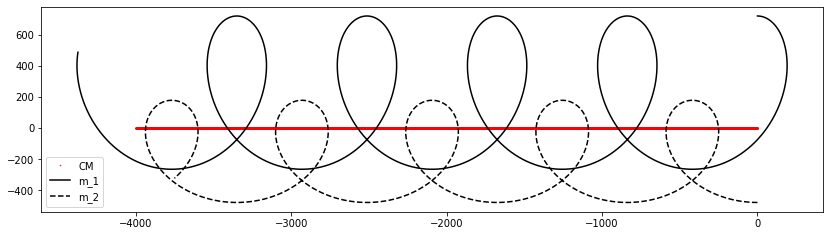

In [28]:
# Defining initial states in rest frame
m_1 = 10
x_1i = [0, 1000]
v_1i = [0.005, 0]

m_2 = 15
x_2i = [0,-200]
v_2i = [-0.01, 0]


# Finding initial center of mass positions and velocities
Ri = findR(m_1,m_2,x_1i,x_2i)
Vi = findV(m_1,m_2,v_1i,v_2i)

t_max = 1000000
dt = 10
ts = np.arange(0,t_max,dt)

# Finding the position of the center of mass as a function of time
R_xs, R_ys = [], []
for t in ts:
    R_x = Vi[0]*t
    R_y = Vi[1]*t
    R_xs.append(R_x)
    R_ys.append(R_y)
Rs = [R_xs, R_ys]


# Finding the initial relative position of the two masses
rel_xi = np.abs(x_1i[0] - x_2i[0])
rel_yi = np.abs(x_1i[1] - x_2i[1])
rel_vxi = np.abs(v_1i[0] - v_2i[0])
rel_vyi = np.abs(v_1i[1] - v_2i[1])
μ = findμ(m_1, m_2)

s = rel_xi, rel_yi, rel_vxi, rel_vyi

# Using old orbitals function to calculate relative motion
rel_pos, rel_vel = orbitals(s, t_max=t_max, dt=dt, d=10, GR = False)


# Uncomment this code to change to CM-frame
# Rs = np.zeros((2,len(rel_pos[0])))

x_1 = findx_1(m_1,m_2,Rs,rel_pos)
x_2 = findx_2(m_1,m_2,Rs,rel_pos)

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(Rs[0], Rs[1], 'r.',markersize=1,label = 'CM')
ax.plot(x_1[0], x_1[1],'k', label = 'm_1')
ax.plot(x_2[0], x_2[1],'k--', label = 'm_2')
ax.set_aspect(1)
ax.legend()

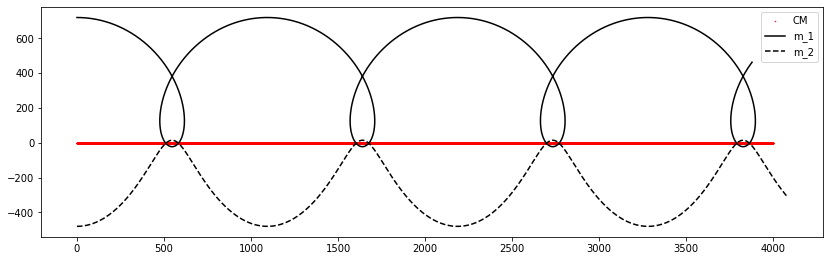

In [32]:
# Defining initial states in rest frame
m_1 = 10
x_1i = [0, 1000]
v_1i = [0.005, 0]

m_2 = 15
x_2i = [0,-200]
v_2i = [0.01, 0]


# Finding initial center of mass positions and velocities
Ri = findR(m_1,m_2,x_1i,x_2i)
Vi = findV(m_1,m_2,v_1i,v_2i)

t_max = 500000
dt = 10
ts = np.arange(0,t_max,dt)

# Finding the position of the center of mass as a function of time
R_xs, R_ys = [], []
for t in ts:
    R_x = Vi[0]*t
    R_y = Vi[1]*t
    R_xs.append(R_x)
    R_ys.append(R_y)
Rs = [R_xs, R_ys]


# Finding the initial relative position of the two masses
rel_xi = np.abs(x_1i[0] - x_2i[0])
rel_yi = np.abs(x_1i[1] - x_2i[1])
rel_vxi = np.abs(v_1i[0] - v_2i[0])
rel_vyi = np.abs(v_1i[1] - v_2i[1])
μ = findμ(m_1, m_2)

s = rel_xi, rel_yi, rel_vxi, rel_vyi

# Using old orbitals function to calculate relative motion
rel_pos, rel_vel = orbitals(s, t_max=t_max, dt=dt, d=10, GR = False)


# Uncomment this code to change to CM-frame
# Rs = np.zeros((2,len(rel_pos[0])))

x_1 = findx_1(m_1,m_2,Rs,rel_pos)
x_2 = findx_2(m_1,m_2,Rs,rel_pos)

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(Rs[0], Rs[1], 'r.',markersize=1,label = 'CM')
ax.plot(x_1[0], x_1[1],'k', label = 'm_1')
ax.plot(x_2[0], x_2[1],'k--', label = 'm_2')
ax.set_aspect(1)
ax.legend()


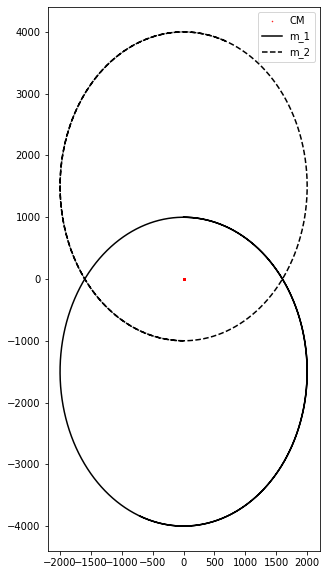

In [33]:
# Defining initial states in rest frame
m_1 = 10
x_1i = [0, 1000]
v_1i = [-0.01, 0]

m_2 = 10
x_2i = [0,-1000]
v_2i = [0.01, 0]


# Finding initial center of mass positions and velocities
Ri = findR(m_1,m_2,x_1i,x_2i)
Vi = findV(m_1,m_2,v_1i,v_2i)

t_max = 5000000
dt = 10
ts = np.arange(0,t_max,dt)

# Finding the position of the center of mass as a function of time
R_xs, R_ys = [], []
for t in ts:
    R_x = Vi[0]*t
    R_y = Vi[1]*t
    R_xs.append(R_x)
    R_ys.append(R_y)
Rs = [R_xs, R_ys]


# Finding the initial relative position of the two masses
rel_xi = np.abs(x_1i[0] - x_2i[0])
rel_yi = np.abs(x_1i[1] - x_2i[1])
rel_vxi = np.abs(v_1i[0] - v_2i[0])
rel_vyi = np.abs(v_1i[1] - v_2i[1])
μ = findμ(m_1, m_2)

s = rel_xi, rel_yi, rel_vxi, rel_vyi

# Using old orbitals function to calculate relative motion
rel_pos, rel_vel = orbitals(s, t_max=t_max, dt=dt, d=10, GR = False)


# Uncomment this code to change to CM-frame
# Rs = np.zeros((2,len(rel_pos[0])))

x_1 = findx_1(m_1,m_2,Rs,rel_pos)
x_2 = findx_2(m_1,m_2,Rs,rel_pos)

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(Rs[0], Rs[1], 'r.', markersize=1,label = 'CM')
ax.plot(x_1[0], x_1[1],'k', label = 'm_1')
ax.plot(x_2[0], x_2[1],'k--', label = 'm_2')
ax.set_aspect(1)
ax.legend()


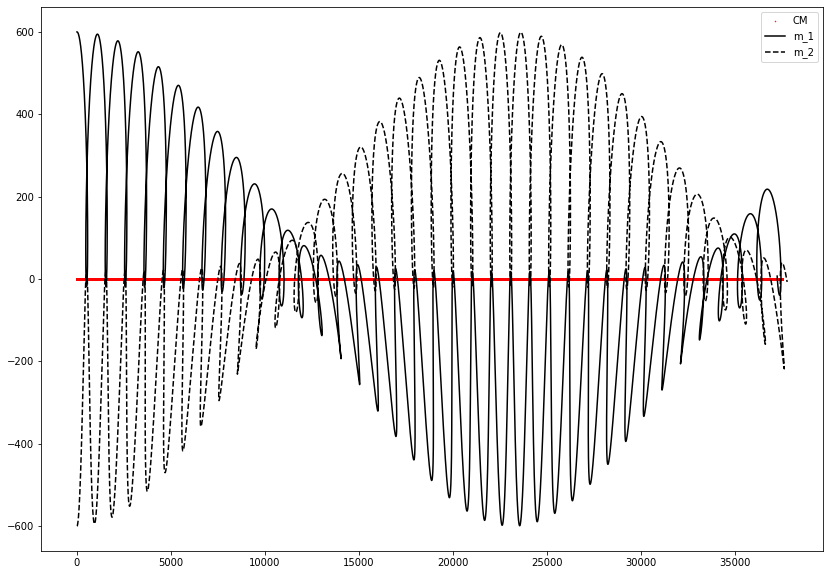

In [38]:
# Defining initial states in rest frame
m_1 = 10
x_1i = [0, 1000]
v_1i = [0.005, 0]

m_2 = 10
x_2i = [0,-200]
v_2i = [0.01, 0]


# Finding initial center of mass positions and velocities
Ri = findR(m_1,m_2,x_1i,x_2i)
Vi = findV(m_1,m_2,v_1i,v_2i)

t_max = 1000000
dt = 10
ts = np.arange(0,t_max,dt)

# Finding the position of the center of mass as a function of time
R_xs, R_ys = [], []
for t in ts:
    R_x = Vi[0]*t
    R_y = Vi[1]*t
    R_xs.append(R_x)
    R_ys.append(R_y)
Rs = [R_xs, R_ys]


# Finding the initial relative position of the two masses
rel_xi = np.abs(x_1i[0] - x_2i[0])
rel_yi = np.abs(x_1i[1] - x_2i[1])
rel_vxi = np.abs(v_1i[0] - v_2i[0])
rel_vyi = np.abs(v_1i[1] - v_2i[1])
μ = findμ(m_1, m_2)

s = rel_xi, rel_yi, rel_vxi, rel_vyi

# Using old orbitals function to calculate relative motion
rel_pos, rel_vel = orbitals(s, t_max=t_max, dt=dt, d=10, GR = True)


# Uncomment this code to change to CM-frame
# Rs = np.zeros((2,len(rel_pos[0])))

x_1 = findx_1(m_1,m_2,Rs,rel_pos)
x_2 = findx_2(m_1,m_2,Rs,rel_pos)

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(Rs[0], Rs[1], 'r.',markersize=1,label = 'CM')
ax.plot(x_1[0], x_1[1],'k', label = 'm_1')
ax.plot(x_2[0], x_2[1],'k--', label = 'm_2')
ax.set_aspect(1)
ax.legend()
